# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json

import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pd.DataFrame(cities).head()


,0
0,hobart
1,jamestown
2,yulara
3,butaritari
4,ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng =[]
max_temp = []
wind_speed = []

counter = 0
set_counter = 1


for city in cities:
    url = f"{base_url}q={city}&units=imperial&APPID={api_key}"
    try:
        weather = requests.get(url, timeout = 1).json()

        cloudiness.append(weather['clouds']['all'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        humidity.append(weather['main']['humidity'])
        max_temp.append(weather['main']['temp_max'])
        wind_speed.append(weather['wind']['speed'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
    except:
        print(f'City not found')

    json.dumps(weather, indent = 4, sort_keys = False)
    
    if counter <50:
        counter +=1
    elif counter >=50:
        counter = 0
        set_counter +=1
    print(f"Request {counter} of 50 | Set {set_counter} | {city.upper()}")


Request 1 of 50 | Set 1 | HOBART
Request 2 of 50 | Set 1 | JAMESTOWN
Request 3 of 50 | Set 1 | YULARA
Request 4 of 50 | Set 1 | BUTARITARI
Request 5 of 50 | Set 1 | USHUAIA
Request 6 of 50 | Set 1 | PORT ELIZABETH
Request 7 of 50 | Set 1 | SORA
Request 8 of 50 | Set 1 | HUANGPI
Request 9 of 50 | Set 1 | TUKTOYAKTUK
Request 10 of 50 | Set 1 | KODIAK
Request 11 of 50 | Set 1 | KAPAA
Request 12 of 50 | Set 1 | ESPERANCE
Request 13 of 50 | Set 1 | AVARUA
Request 14 of 50 | Set 1 | PEVEK
Request 15 of 50 | Set 1 | PONTA DO SOL
City not found
Request 16 of 50 | Set 1 | PUNTA ARENAS
Request 17 of 50 | Set 1 | AMAHAI
Request 18 of 50 | Set 1 | ALBANY
Request 19 of 50 | Set 1 | HITHADHOO
Request 20 of 50 | Set 1 | TAZMALT
Request 21 of 50 | Set 1 | OKHOTSK
City not found
Request 22 of 50 | Set 1 | KAPOETA
Request 23 of 50 | Set 1 | HAVRE-SAINT-PIERRE
City not found
Request 24 of 50 | Set 1 | TAOLANARO
Request 25 of 50 | Set 1 | PROGRESO
Request 26 of 50 | Set 1 | BELOHA
Request 27 of 50 | Set 1

In [24]:
#Write extracted data into csv file
ls_zip = zip(cities, cloudiness, country, date, humidity, max_temp, wind_speed, lat, lng)

weather_df = pd.DataFrame(data = ls_zip)
weather_df = weather_df.rename(columns = {0:"Cities",
                                          1: "Cloudiness",
                                          2: "Country",
                                          3: "Date",
                                          4: "Humidity",
                                          5: "Max Temp",
                                          6: "Wind Speed",
                                          7: "Latitude",
                                          8: "Longitude"
                                         })
weather_df

,Cities,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude,Longitude
4,ushuaia,40,AR,1571689099,38,59.0,19.46,-54.81,-68.31


In [25]:
weather_df

,Cities,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude,Longitude
0,hobart,20,AU,1571689097,81,48.99,10.29,-42.88,147.33
1,jamestown,92,AU,1571689097,36,59.36,9.62,-33.21,138.60
2,yulara,0,AU,1571689098,17,62.60,6.93,-25.24,130.99
3,butaritari,28,KI,1571689098,77,83.55,14.58,3.07,172.79
4,ushuaia,40,AR,1571689099,38,59.00,19.46,-54.81,-68.31
...,...,...,...,...,...,...,...,...,...
550,scottsbluff,0,AR,1571689313,19,79.18,17.90,-27.78,-67.24
551,oxbow,100,JP,1571689314,95,64.99,8.01,34.70,138.93
552,ankazobe,75,JP,1571689314,100,64.40,1.12,34.58,135.74
553,gap,20,US,1571689314,49,48.20,23.04,44.06,-103.15


In [46]:
#Write data frame into csv file
weather_df.to_csv("city_weather_data.csv",encoding = 'utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

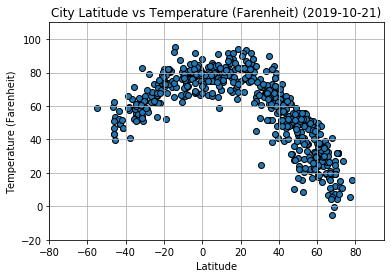

In [42]:
plt.scatter(lat, max_temp, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.xlim(-80,95)
plt.ylim(-20,110)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Temperature (Farenheit) ({plot_date})")
plt.savefig ("Latitude_vs_Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

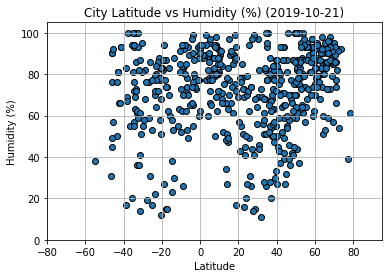

In [43]:
plt.scatter(lat, humidity, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,95)
plt.ylim(0,105)
plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Humidity (%) ({plot_date})")

plt.savefig ("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

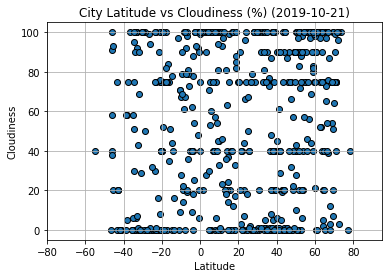

In [44]:
plt.scatter(lat, cloudiness, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-80,95)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Cloudiness (%) ({plot_date})")

plt.savefig ("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

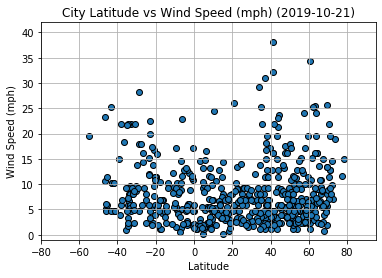

In [45]:
plt.scatter(lat, wind_speed, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,95)
plt.ylim(-1,42)
plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Wind Speed (mph) ({plot_date})")

plt.savefig('Latitude_vs_Wind_Speed.png')
plt.show()